In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets , linear_model
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('Titanic_TrainingDataset.csv')
train.shape

(891, 12)

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df= train[['Survived','Pclass','Sex','Age','Fare']]
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
df['Sex'] = df['Sex'].apply(lambda Sex:1 if Sex=='male' else 0)
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [10]:
x_train = df.drop('Survived',axis = 1)
y_train = df['Survived']

In [11]:
x_train.head(5)

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [12]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
logreg = LogisticRegression()
titianmodel = logreg.fit(x_train,y_train)

In [14]:
type(titianmodel)

sklearn.linear_model._logistic.LogisticRegression

In [15]:
data = {'Pclass': [3, 2], 'Sex': [1, 0],'Age': [40, 35], 'Fare': [7.98, 8.99]}
passengers = pd.DataFrame(data)
passengers

,Pclass,Sex,Age,Fare
0,3,1,40,7.98
1,2,0,35,8.99


In [16]:
predictions = titianmodel.predict(passengers)
print(predictions)

[0 1]


In [17]:
test = pd.read_csv('Titanic_TestDataset.csv')
test.shape

(418, 11)

In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
x_test = test[['Pclass','Sex','Age','Fare']]
x_test['Sex'] = x_test['Sex'].apply(lambda Sex:1 if Sex=='male' else 0)


In [21]:
x_test.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [22]:
x_test['Age']  = x_test['Age'].fillna(x_test['Age'].median())

In [24]:
x_test = x_test.dropna()

In [25]:
x_test.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [26]:
y_predicted = titianmodel.predict(x_test)

In [29]:
x_test['SurvivedPred'] = y_predicted

In [1]:
x_test

NameError: name 'x_test' is not defined

In [25]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [26]:
train=pd.read_csv("Titanic_TrainingDataset.csv")
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df = train[['Survived','Pclass','Sex','Age','Fare']]
df['Sex'] = df['Sex'].apply(lambda Sex:1 if Sex=='male' else 0)
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [29]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [30]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [31]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state = 25)

In [33]:
logreg = LogisticRegression()
titanmodel = logreg.fit(x_train,y_train)

In [34]:
y_predict = titanmodel.predict(x_test)
print(y_predict[:10])

[0 0 0 0 0 0 0 0 1 0]


In [35]:
accuracy = round(accuracy_score(y_test,y_predict)*100,2)
print(accuracy)

77.61


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
train=pd.read_csv("chocolatedata.txt", index_col=False, sep="\t",header=0)
train.shape

(100, 5)

In [41]:
x= np.array(train['customer_happiness']).reshape(-1,1)
y = np.array(train['cocoa_percent']).reshape(-1,1)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=25)

In [43]:
linreg = LinearRegression()
linmodel = linreg.fit(x_train,y_train)

In [44]:
y_predict = linmodel.predict(x_test)

In [45]:
y_predict

array([[42.99778027],
       [46.78823806],
       [49.82060429],
       [17.98075889],
       [48.30442117],
       [36.93304782],
       [45.27205494],
       [45.27205494],
       [30.1102238 ],
       [42.99778027],
       [41.48159716],
       [15.70648421],
       [22.52930823],
       [16.46457577],
       [36.93304782],
       [33.14259003],
       [27.83594913],
       [32.38449847],
       [23.28739979],
       [24.04549134],
       [45.27205494],
       [28.59404069],
       [23.28739979],
       [41.48159716],
       [20.25503356],
       [38.44923093],
       [32.38449847],
       [32.38449847],
       [26.31976601],
       [13.43220954]])

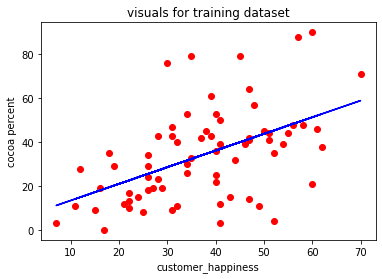

In [47]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,linmodel.predict(x_train),color='blue')
plt.title('visuals for training dataset')
plt.xlabel('customer_happiness')
plt.ylabel('cocoa percent')
plt.show()

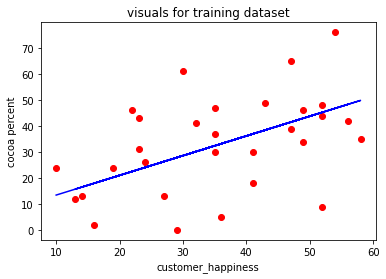

In [48]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,linmodel.predict(x_test),color='blue')
plt.title('visuals for training dataset')
plt.xlabel('customer_happiness')
plt.ylabel('cocoa percent')
plt.show()